In [1]:
#Convolutional Neural Network (Evrişimli Derin Sinir Ağı)

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.utils import to_categorical #one-hot encoding

In [7]:
#One-hot encoding (Binary encoding), label encoding (integer encoding)
"""
red, green, blue
0,   1,     2   (label-integer encoding)

1,   0,     0
0,   1,     0
0,   0,     1   (binary-one hot encoding)
"""

'\nred, green, blue\n0,   1,     2   (label-integer encoding)\n\n1,   0,     0\n0,   1,     0\n0,   0,     1   (binary-one-hot encoding)\n'

In [8]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = array(data)
print(values)

#integer encoding
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

#binary encoding
onehot_encoder = OneHotEncoder(sparse = False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

['cold' 'cold' 'warm' 'cold' 'hot' 'hot' 'warm' 'cold' 'warm' 'hot']
[0 0 2 0 1 1 2 0 2 1]
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [9]:
#invert first example

In [11]:
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[4, :])])
print(inverted)

['hot']


In [12]:
#MNIST CNN (devamı)

In [13]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

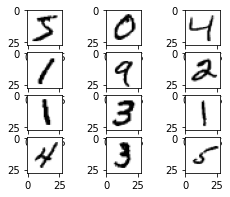

In [14]:
plt.figure(figsize = (4,3))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.grid(False)
    plt.imshow(X_train[i], cmap = plt.cm.binary)
plt.show()

In [15]:
X_train.shape[0]

60000

In [16]:
X_test.shape[0]

10000

In [17]:
#Keras input boyutunu ayarlama
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [18]:
#one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [19]:
#normalizasyon
X_train = X_train / 255
X_test = X_test / 255

In [21]:
#Keras modelinin kurulması
input_shape = (28, 28, 1)
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(10, activation = "softmax"))

In [22]:
model.compile(
    optimizer = 'adam',
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

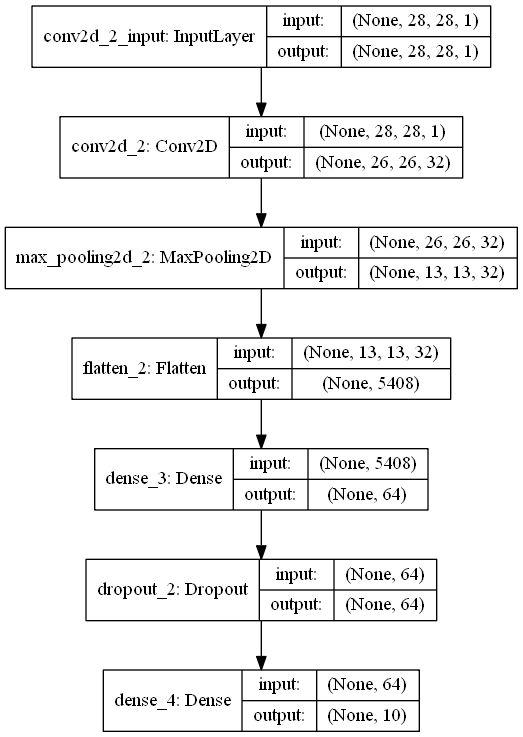

In [23]:
tf.keras.utils.plot_model(model, "0202-EcoDL.png", show_shapes = True, show_layer_names = True)

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
history = model.fit(
    X_train,
    y_train,
    verbose = 2, #0, 1 [=======>], 2 -> Epoch 1/5
    epochs = 5,
    batch_size = 16,
    validation_split = 0.2
)


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
 - 51s - loss: 0.3389 - accuracy: 0.8964 - val_loss: 0.1080 - val_accuracy: 0.9693
Epoch 2/5
 - 39s - loss: 0.1721 - accuracy: 0.9474 - val_loss: 0.1122 - val_accuracy: 0.9678
Epoch 3/5
 - 38s - loss: 0.1371 - accuracy: 0.9576 - val_loss: 0.0766 - val_accuracy: 0.9783
Epoch 4/5
 - 39s - loss: 0.1125 - accuracy: 0.9650 - val_loss: 0.0726 - val_accuracy: 0.9807
Epoch 5/5
 - 42s - loss: 0.0995 - accuracy: 0.9686 - val_loss: 0.0685 - val_accuracy: 0.9813


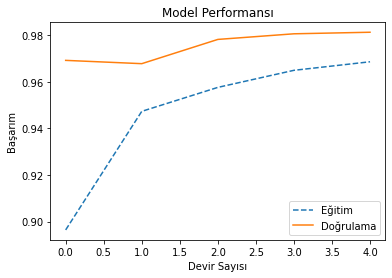

In [26]:
plt.plot(history.history["accuracy"], '--')
plt.plot(history.history["val_accuracy"])
plt.title("Model Performansı")
plt.ylabel("Başarım")
plt.xlabel("Devir Sayısı")
plt.legend(["Eğitim", "Doğrulama"], loc = "lower right")
plt.show()

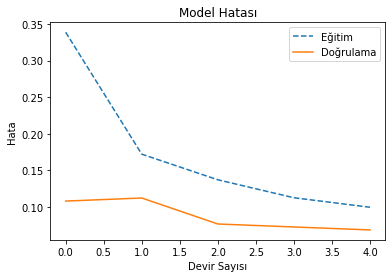

In [27]:
plt.plot(history.history["loss"], '--')
plt.plot(history.history["val_loss"])
plt.title("Model Hatası")
plt.ylabel("Hata")
plt.xlabel("Devir Sayısı")
plt.legend(["Eğitim", "Doğrulama"], loc = "upper right")
plt.show()

In [28]:
score = model.evaluate(X_test, y_test, verbose = 0)
print("Test verisiyle model başarımı : %.2f%%" % (score[1]*100))

Test verisiyle model başarımı : 97.93%
